In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
from cosamp import cosamp

## Signal generation

In [56]:
N = 4096 # sample rate of high resolution signal
t = np.linspace(0, 1, N)
f1 = 70
f2 = 400
f3 = 900
z = np.cos(2 * np.pi * f1 * t) + 0.5 * np.cos(2 * np.pi * f2 * t) + 0.3 * np.cos(2 * np.pi * f3 * t)
z_fft = np.fft.fft(z)
z_PSD = np.abs(z_fft * np.conj(z_fft)) / N

## random sampling

In [57]:
m = 100 # number of random samples
perm = np.floor(np.random.rand(m) * N).astype(int)
y = z[perm]

## plot time- and PSD-signal

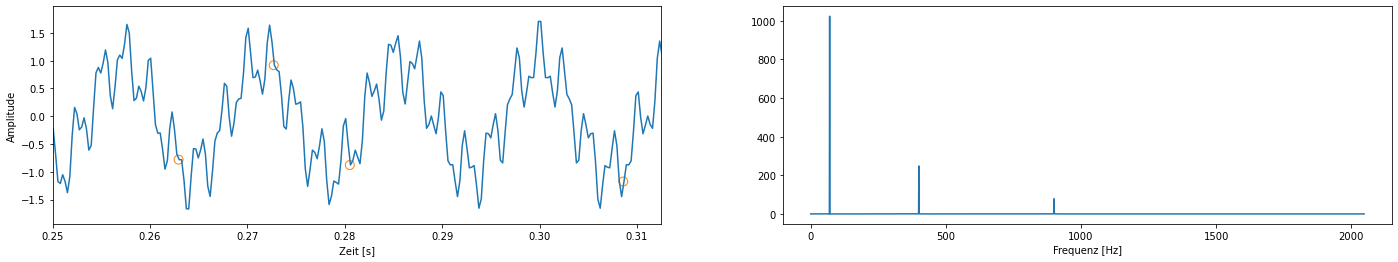

In [58]:
time_window = np.array([1024, 1280]) / N
freq = np.arange(N)
L = int(np.floor(N/2))

fig, axs = plt.subplots(1, 2, figsize=(24, 4))

axs[0].plot(t, z)
axs[0].scatter(perm/N, y, s=80, edgecolors='C1', facecolors='none')
axs[0].set_xlim(time_window[0], time_window[1])
axs[0].set_xlabel('Zeit [s]')
axs[0].set_ylabel('Amplitude')

axs[1].plot(freq[:L], z_PSD[:L])
axs[1].set_xlabel('Frequenz [Hz]')
fig.savefig('signal_3f.pdf')
fig.savefig('signal_3f.png')
fig.show()

## Compressed Sensing
#### using the [CoSaMP-Algorithm](http://users.cms.caltech.edu/~jtropp/papers/NT08-CoSaMP-Iterative-preprint.pdf)

In [59]:
psi = dct(np.identity(N))
A = psi[perm, :]

x_recon = cosamp(A, y, 6, max_iter=20)
z_recon = idct(x_recon) # reconstruction

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7


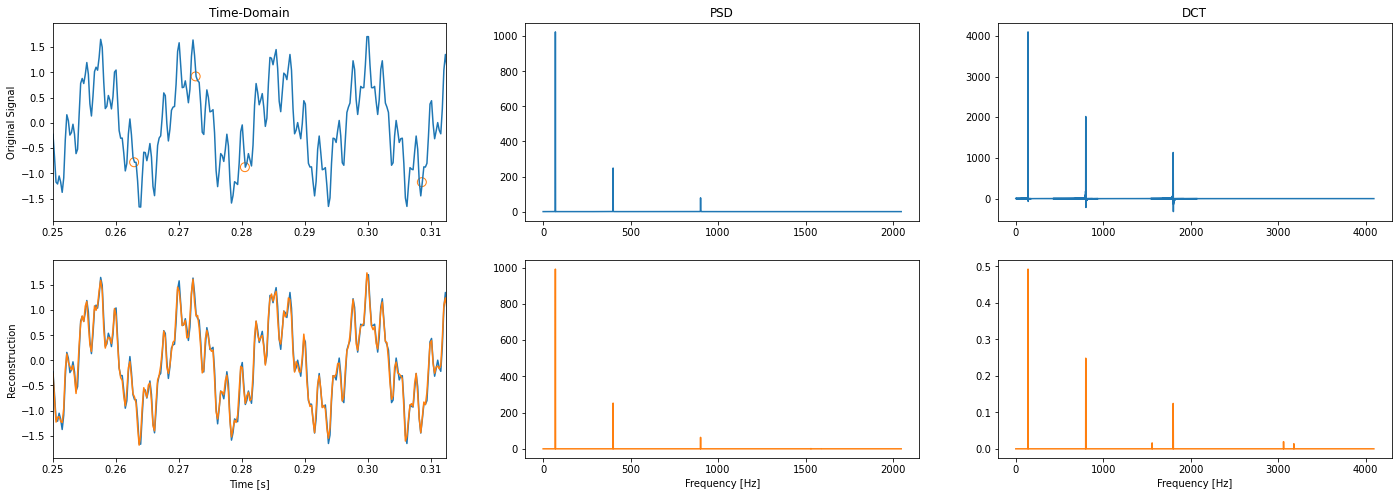

In [60]:
z_recon_fft = np.fft.fft(z_recon, N)
z_recon_PSD = np.abs(z_recon_fft * np.conj(z_recon_fft)) / N

fig, axs = plt.subplots(2, 3, figsize=(24, 8))

axs[0][0].plot(t, z)
axs[0][0].scatter(perm/N, y, s=80, edgecolors='C1', facecolors='none')
axs[0][0].set_xlim(time_window[0], time_window[1])
axs[0][0].set_title('Time-Domain')
axs[0][0].set_ylabel('Original Signal')

axs[0][1].plot(freq[:L], z_PSD[:L])
axs[0][1].set_title('PSD')

axs[1][0].plot(t, z)
axs[1][0].plot(t, z_recon)
axs[1][0].set_xlim(time_window[0], time_window[1])
axs[1][0].set_ylabel('Reconstruction')
axs[1][0].set_xlabel('Time [s]')


axs[1][1].plot(freq[:L], z_recon_PSD[:L], color='C1')
axs[1][1].set_xlabel('Frequency [Hz]')

axs[0][2].plot(freq, dct(z))
axs[0][2].set_title('DCT')

axs[1][2].plot(freq, x_recon, color='C1')
axs[1][2].set_xlabel('Frequency [Hz]')

fig.show()

## Comparison to $l_2$-Recovery

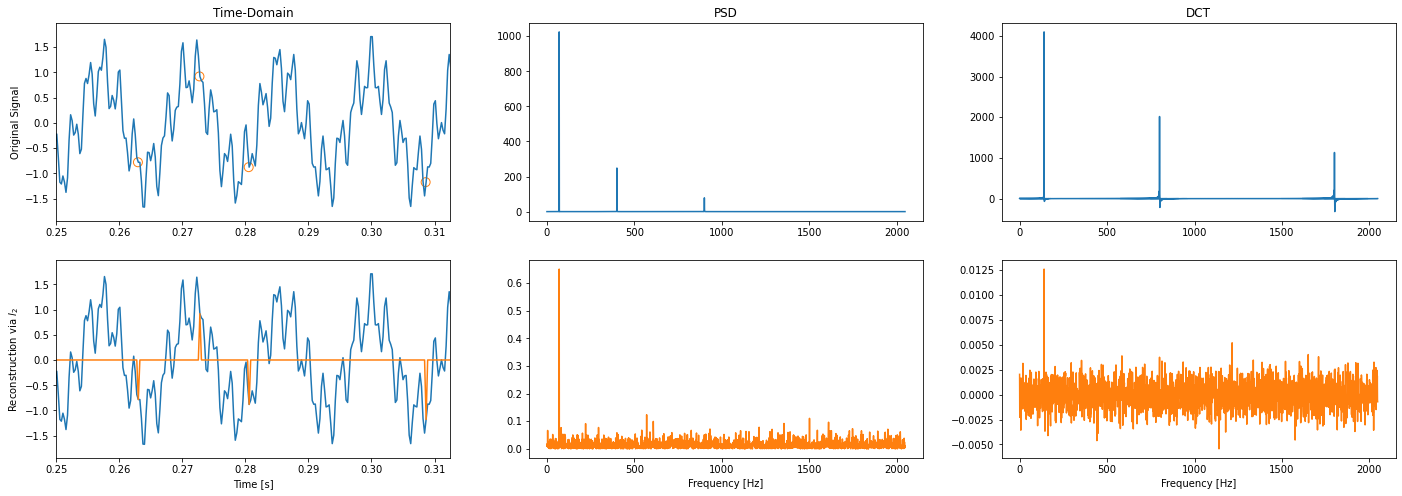

In [61]:
x_l2 = np.linalg.pinv(A) @ y
z_l2 = idct(x_l2)

fig, axs = plt.subplots(2, 3, figsize=(24, 8))

axs[0][0].plot(t, z)
axs[0][0].scatter(perm/N, y, s=80, edgecolors='C1', facecolors='none')
axs[0][0].set_xlim(time_window[0], time_window[1])
axs[0][0].set_title('Time-Domain')
axs[0][0].set_ylabel('Original Signal')

axs[0][1].plot(freq[:L], z_PSD[:L])
axs[0][1].set_title('PSD')

axs[1][0].plot(t, z)
axs[1][0].plot(t, z_l2)
axs[1][0].set_xlim(time_window[0], time_window[1])
axs[1][0].set_ylabel('Reconstruction via $l_2$')
axs[1][0].set_xlabel('Time [s]')

z_l2_fft = np.fft.fft(z_l2, N)
z_l2_PSD = np.abs(z_l2_fft * np.conj(z_l2_fft)) / N

axs[1][1].plot(freq[:L], z_l2_PSD[:L], color='C1')
axs[1][1].set_xlabel('Frequency [Hz]')

axs[0][2].plot(freq[:L], dct(z)[:L])
axs[0][2].set_title('DCT')

axs[1][2].plot(freq[:L], x_l2[:L], color='C1')
axs[1][2].set_xlabel('Frequency [Hz]')


fig.show()

In [62]:
# Plots for presentation
# (fig1, ax1), (fig2, ax2) = plt.subplots(figsize=(10, 4)), plt.subplots(figsize=(10, 4))

# ax1.plot(t, z)
# ax1.scatter(perm/N, y, s=80, edgecolors='C1', facecolors='none')
# ax1.set_xlim(time_window[0], time_window[1])
# ax1.set_xlabel('Zeit [s]', fontsize='x-large')
# ax1.set_ylabel('Amplitude', fontsize='x-large')

# ax2.plot(freq[:L], z_PSD[:L])
# ax2.set_xlabel('Frequenz [Hz]', fontsize='x-large')
# ax2.set_ylabel('Amplitude', fontsize='x-large')
# fig1.savefig('signal_3f_zeit.pdf')
# fig1.savefig('signal_3f_zeit.png')
# fig2.savefig('signal_3f_freq.pdf')
# fig2.savefig('signal_3f_freq.png')


# (fig1, ax1), (fig2, ax2) = plt.subplots(figsize=(10, 4)), plt.subplots(figsize=(10, 4))

# ax1.plot(t, z)
# ax1.plot(t, z_recon, color='C1')
# ax1.set_xlim(time_window[0], time_window[1])
# ax1.set_xlabel('Zeit [s]', fontsize='x-large')
# ax1.set_ylabel('Amplitude', fontsize='x-large')

# ax2.plot(freq[:L], z_PSD[:L], label='Originales Signal')
# ax2.plot(freq[:L], z_recon_PSD[:L], color='C1', label='Rekonstruiertes Signal')
# ax2.set_xlabel('Frequenz [Hz]', fontsize='x-large')
# ax2.set_ylabel('Amplitude', fontsize='x-large')
# ax2.legend(fontsize='x-large')
# fig1.savefig('signal_3f_recon_zeit.pdf')
# fig1.savefig('signal_3f_recon_zeit.png')
# fig2.savefig('signal_3f_recon_freq.pdf')
# fig2.savefig('signal_3f_recon_freq.png')